In [1]:
import torch
import torch.nn.functional as F
from torchmetrics.functional import structural_similarity_index_measure
from matplotlib import pyplot as plt

from datasets.data import DIV2K
from metrics import PSNR, SSIM

In [2]:
data_dir = "D:\\DATA\\DIV2K"

valid_dataset = DIV2K(data_dir, train=False,gray_scale=True)
valid_loader = torch.utils.data.DataLoader(valid_dataset, batch_size=8, shuffle=False)

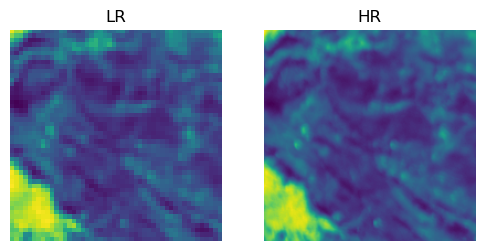

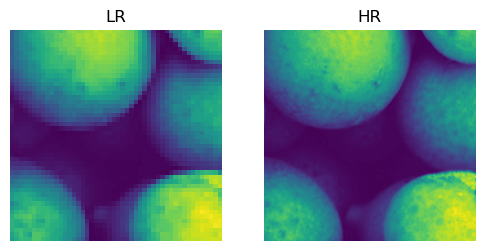

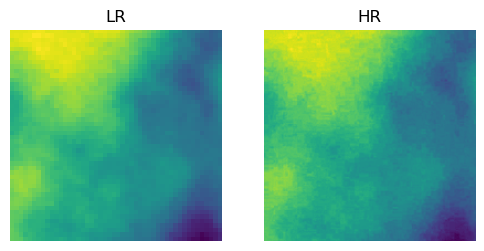

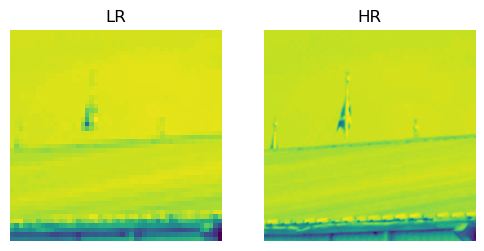

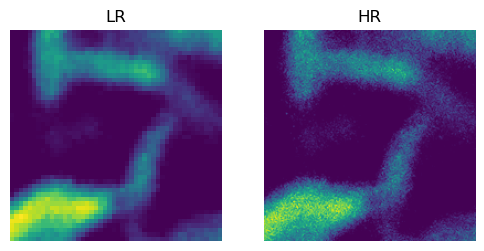

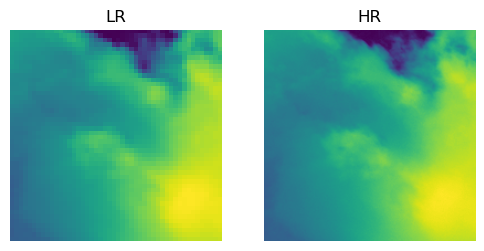

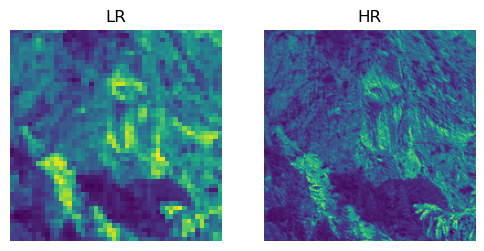

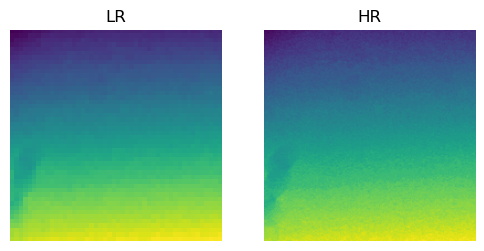

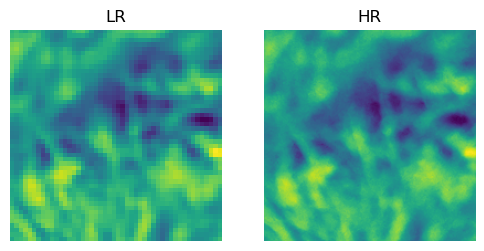

In [4]:
for i, (lr, hr) in enumerate(valid_dataset):
    
    if i == 81:
        break

    if i % 9:
        continue
    
    #visualize the images
    plt.figure(figsize=(6, 6))
    plt.subplot(1, 2, 1)
    plt.imshow(lr.permute(1, 2, 0))
    plt.title("LR")
    plt.axis("off")
    plt.subplot(1, 2, 2)
    plt.imshow(hr.permute(1, 2, 0))
    plt.title("HR")
    plt.axis("off")
    plt.show()
    
    #visualize
    # plt.figure(figsize=(6, 6))
    # plt.subplot(1, 2, 1)
    # plt.imshow(lr_1.permute(1, 2, 0))
    # plt.title("LR")
    # plt.axis("off")
    # plt.subplot(1, 2, 2)
    # plt.imshow(hr_1.permute(1, 2, 0))
    # plt.title("HR")
    # plt.axis("off")
    
    
    


In [4]:
psnr = 0
ssim = 0

for i, (lr, hr) in enumerate(valid_loader):
    
    output = F.interpolate(lr, scale_factor=4, mode='nearest')
    
    psnr += PSNR(output, hr)
    ssim += SSIM(output, hr)

print(f"PSNR: {psnr / len(valid_loader)}")
print(f"SSIM: {ssim / len(valid_loader)}")

c:\Users\ruix\anaconda3\Lib\site-packages\torchmetrics\utilities\prints.py:70: FutureWarning: Importing `spectral_angle_mapper` from `torchmetrics.functional` was deprecated and will be removed in 2.0. Import `spectral_angle_mapper` from `torchmetrics.image` instead.
  _future_warning(


PSNR: 25.648513793945312
SSIM: 0.7232754230499268


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


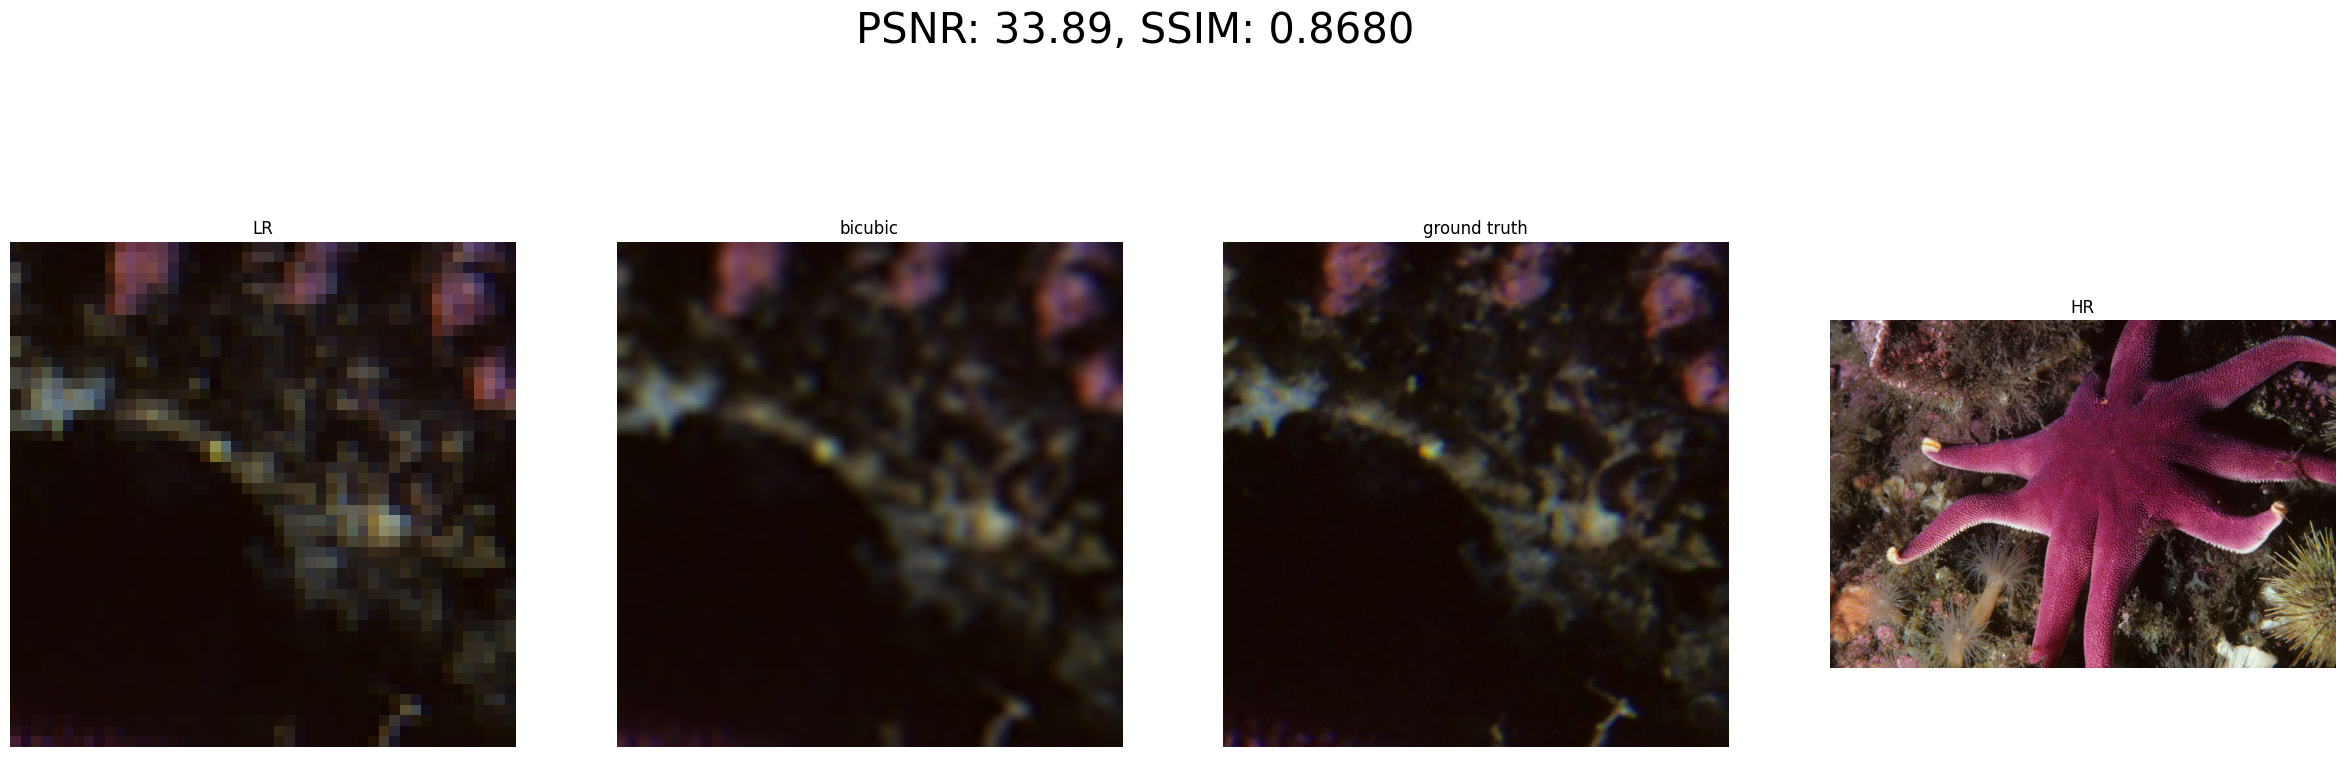

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


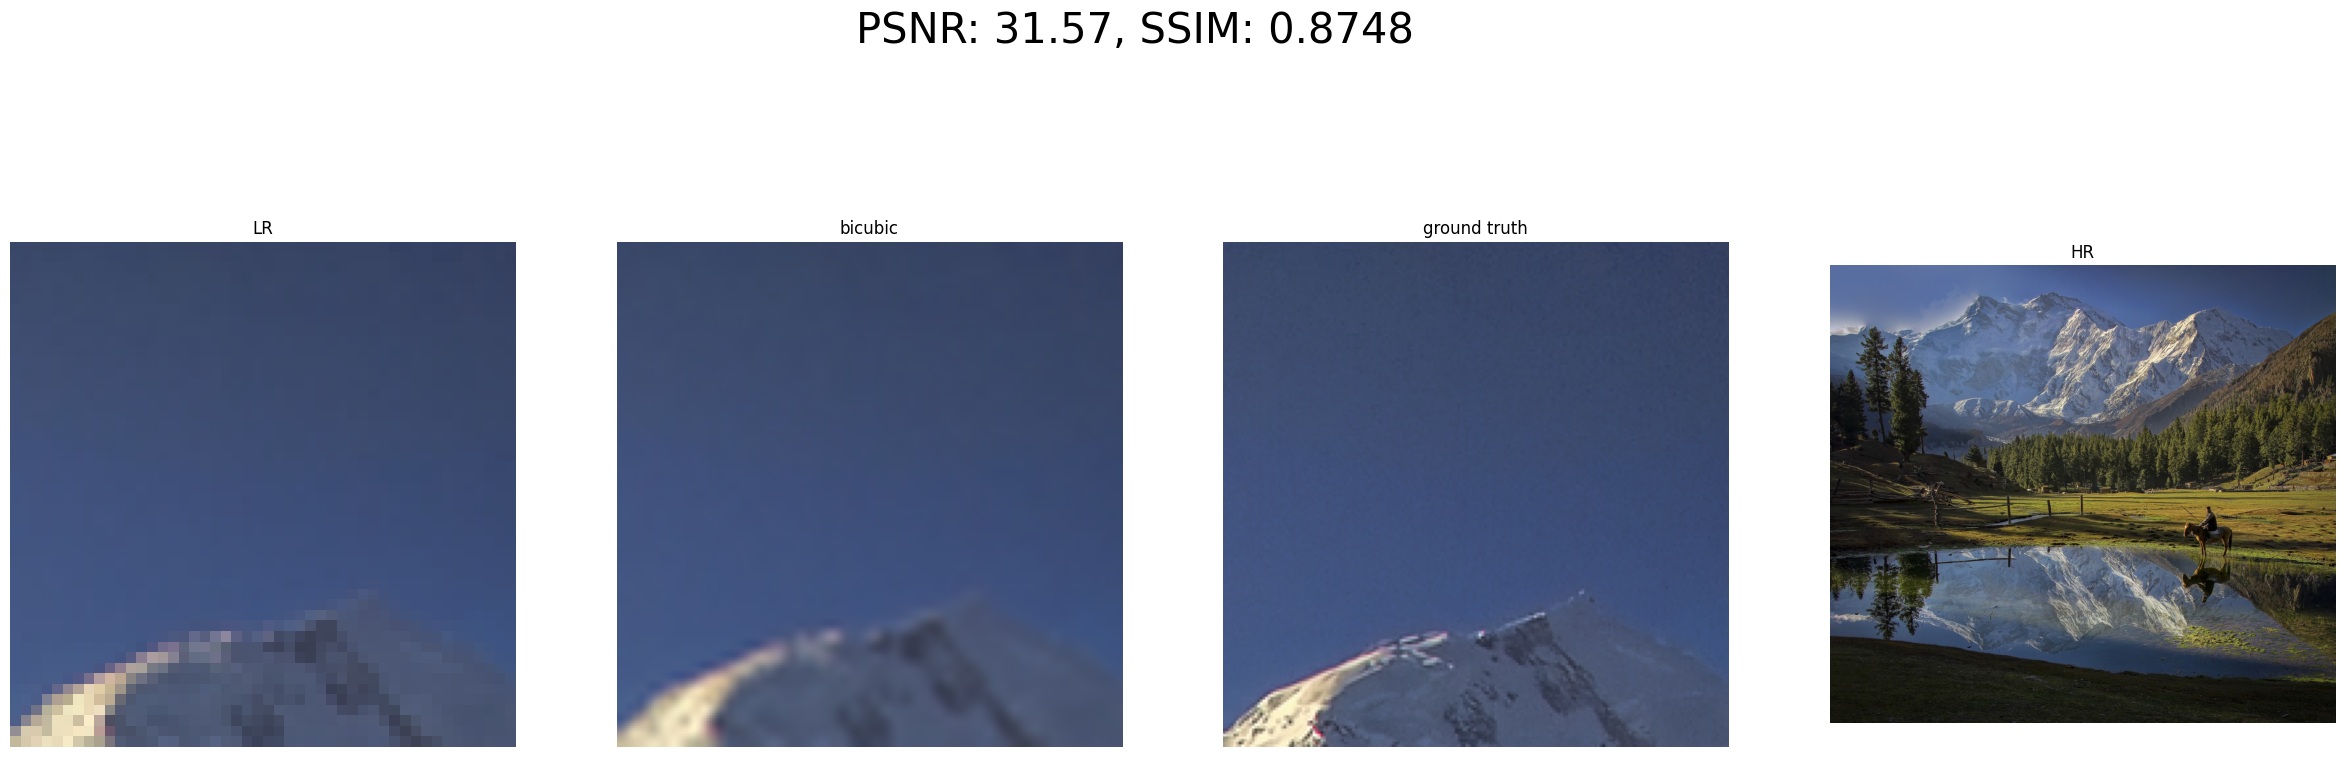

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


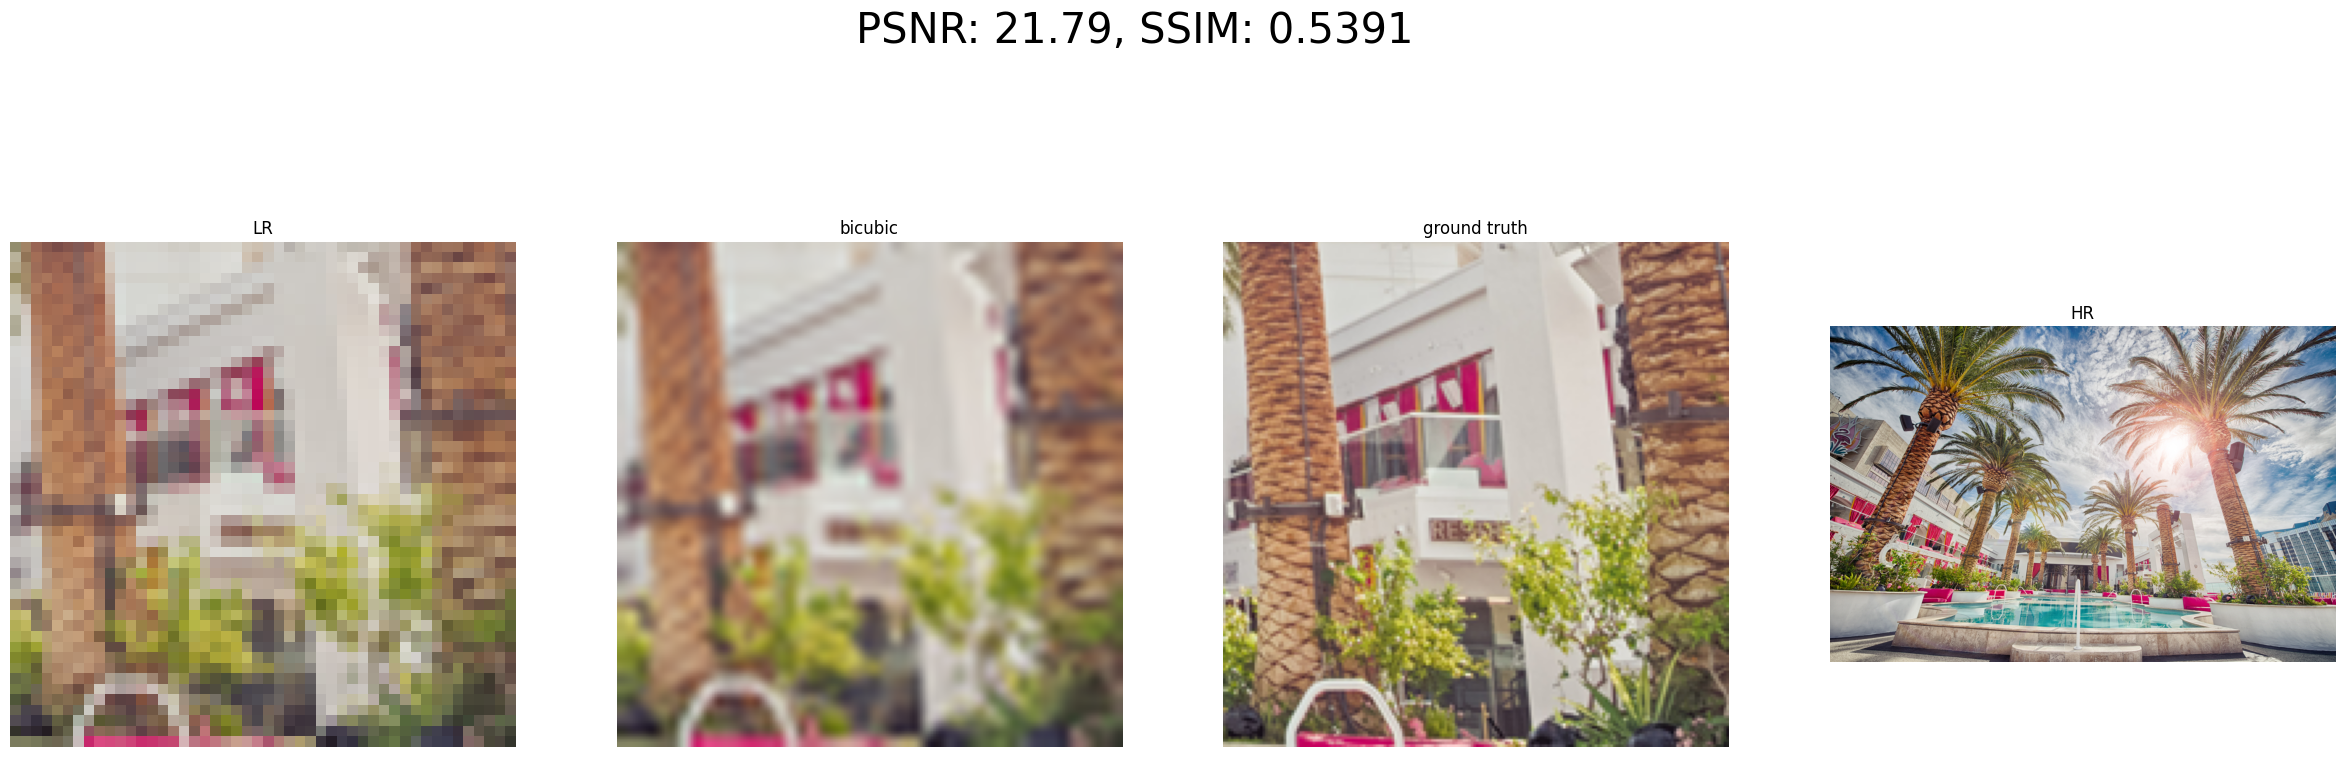

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


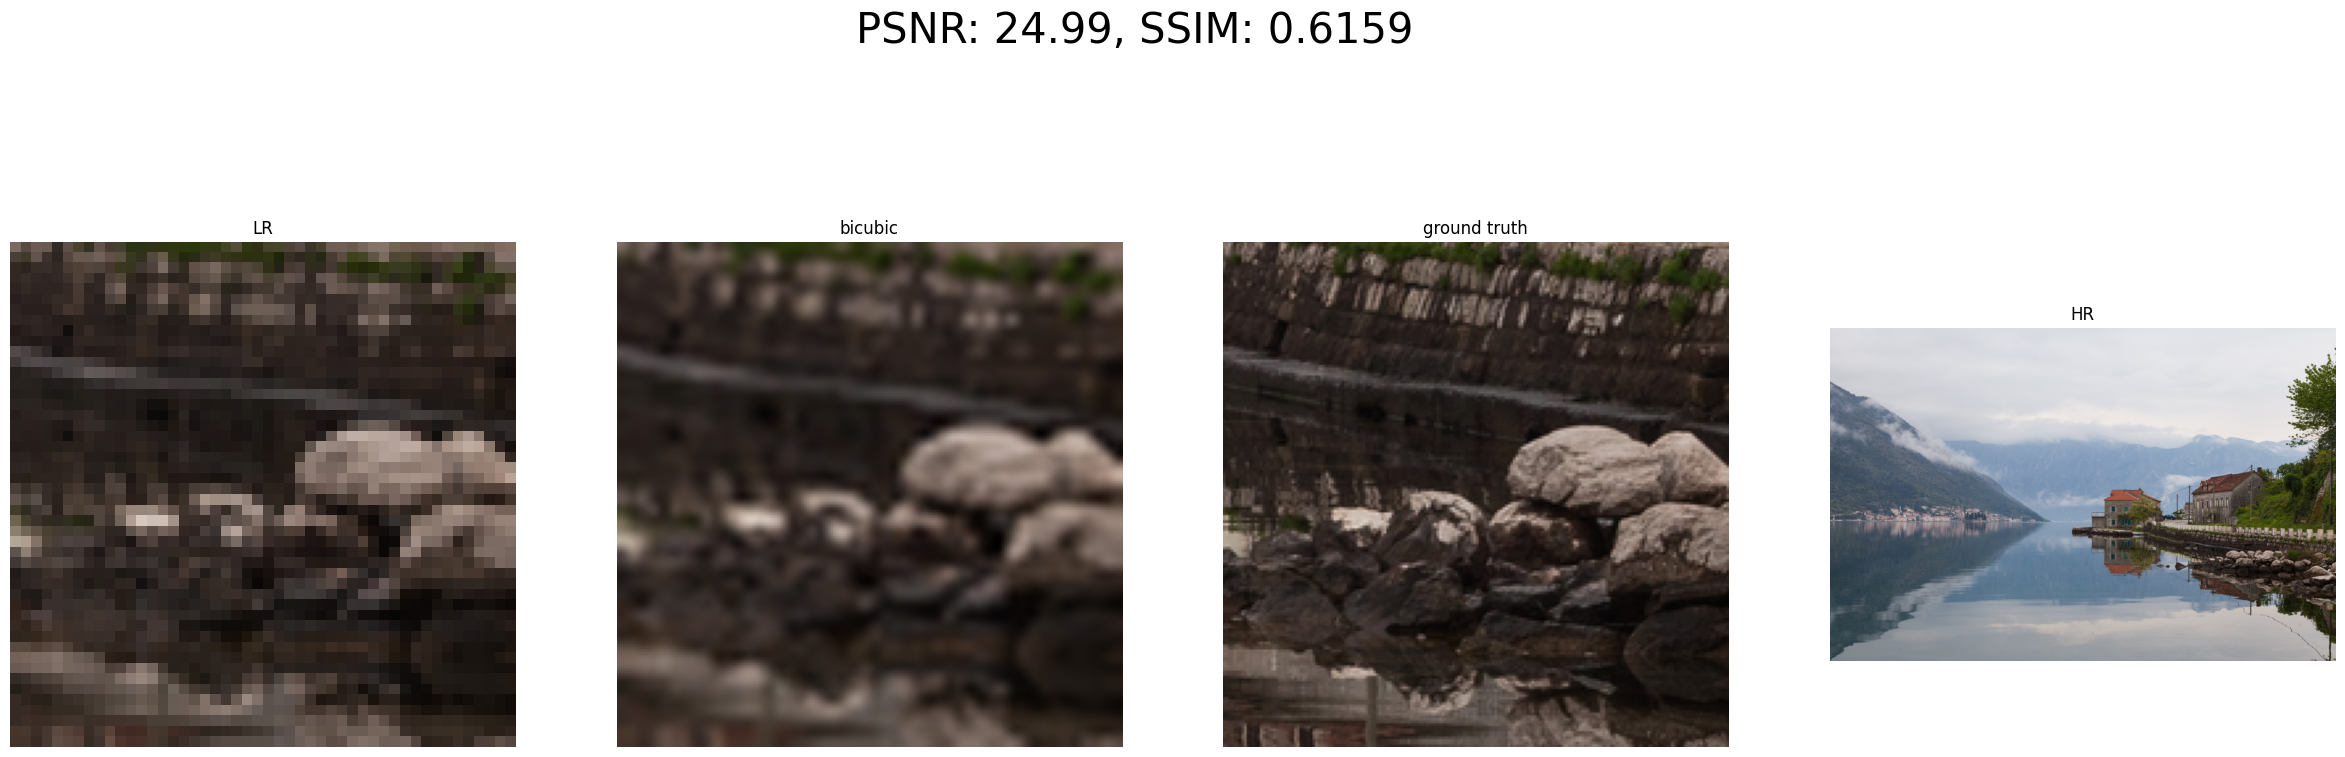

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


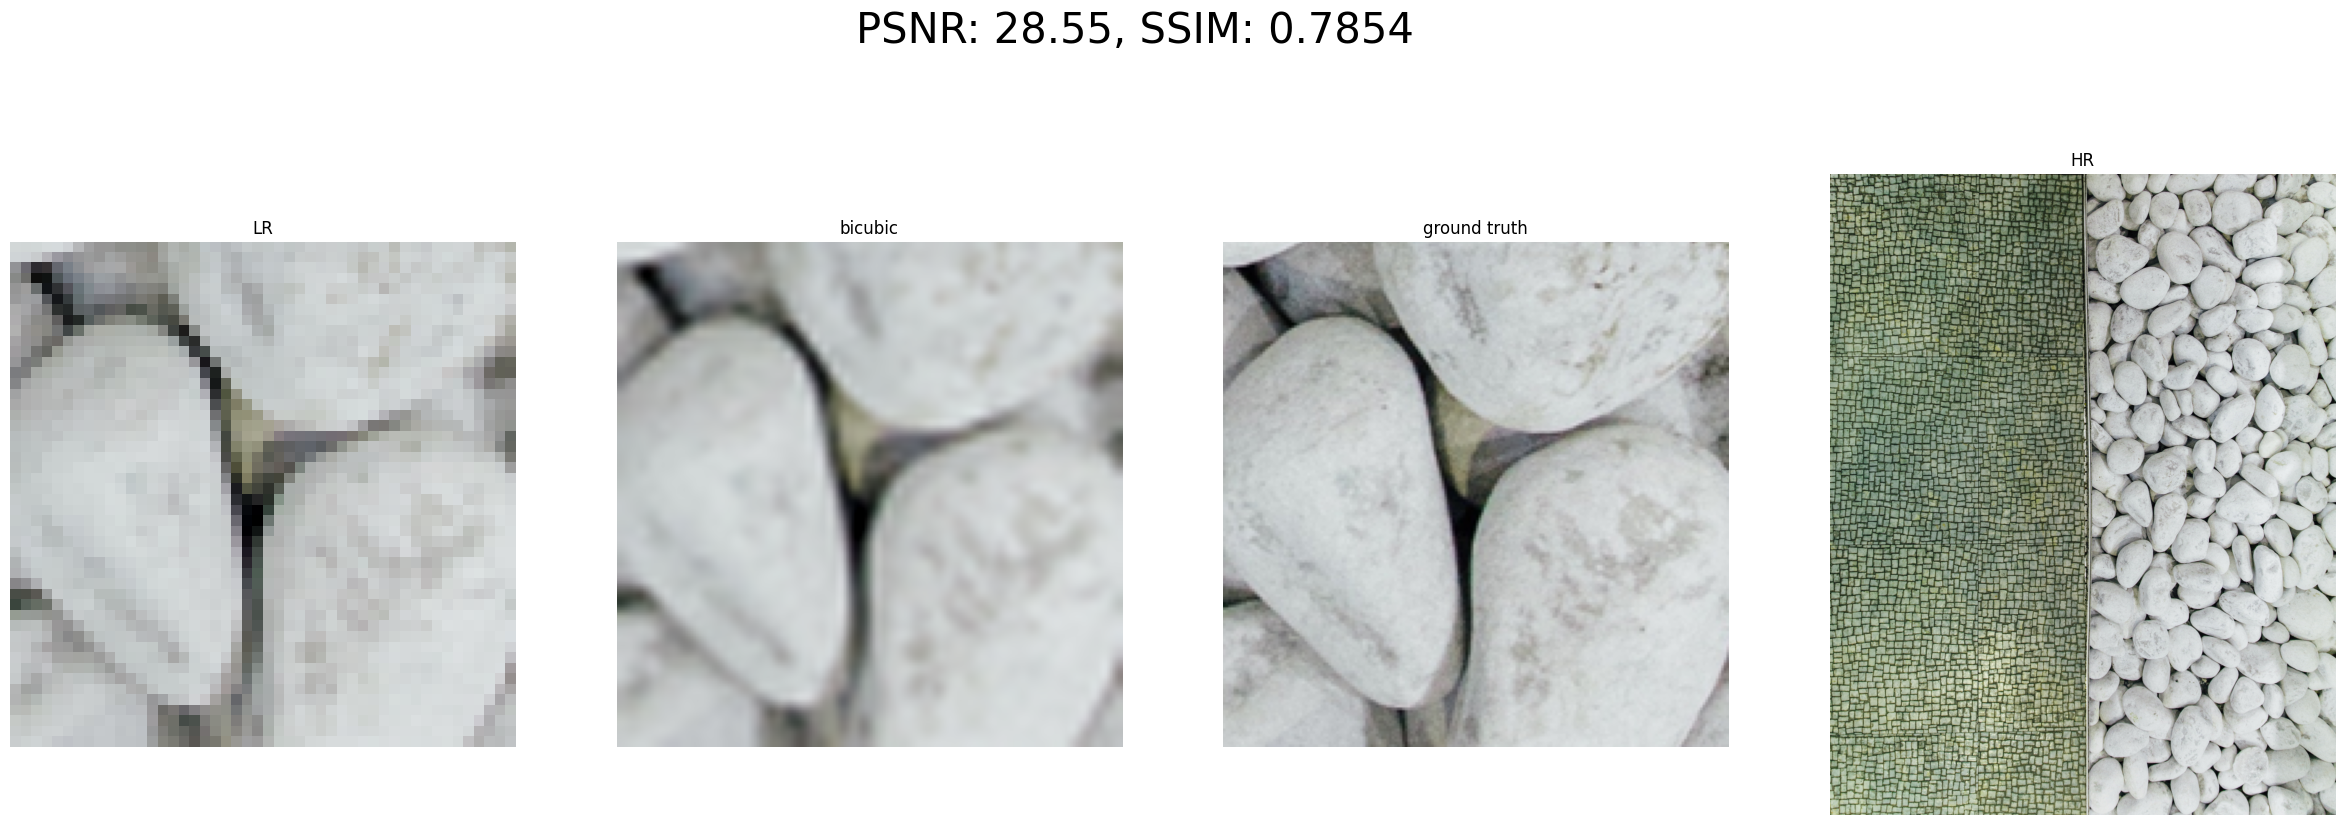

In [56]:
valid_dataset = DIV2K(data_dir, train=True, visualize=True)

for i, (lr_image_patched, hr_image_patched, lr_image, hr_image) in enumerate(valid_dataset):
    
    if i == 5:
        break
    lr_image_patched = lr_image_patched.unsqueeze(0)
    hr_image_patched = hr_image_patched.unsqueeze(0)
    output = F.interpolate(lr_image_patched, scale_factor=4, mode='bicubic', align_corners=False)
    
    psnr = 10 * torch.log10(1 / F.mse_loss(output, hr_image_patched))
    ssim = structural_similarity_index_measure(output, hr_image_patched)
    
    
    fig, axis = plt.subplots(1, 4, figsize=(30, 10))
    fig.suptitle(f"PSNR: {psnr:.2f}, SSIM: {ssim:.4f}", fontsize=30)
    axis[0].imshow(lr_image_patched.squeeze(0).permute(1, 2, 0))
    axis[0].set_title("LR")
    axis[0].axis('off')
    
    axis[1].imshow(output.squeeze(0).permute(1, 2, 0))
    axis[1].set_title("bicubic")
    axis[1].axis('off')
    
    axis[2].imshow(hr_image_patched.squeeze(0).permute(1, 2, 0))
    axis[2].set_title("ground truth")
    axis[2].axis('off')
    
    axis[3].imshow(hr_image.squeeze(0).permute(1, 2, 0))
    axis[3].set_title("HR")
    axis[3].title_size = 30
    axis[3].axis('off')
    
    plt.show()
    
    
    
    
    